<a href="https://colab.research.google.com/github/rushikeshnaik779/sms_spam/blob/main/SMS_spam_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
uploaded = files.upload()

Saving spam.csv to spam.csv


In [6]:
import io 
import pandas as pd
sms = pd.read_csv(io.BytesIO(uploaded['spam.csv']), encoding='latin-1')


In [7]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
# importing requried libraries 
import numpy as np
import seaborn as sns
import matplotlib as mtl 
import matplotlib.pyplot as plt
import string 


In [9]:
# let drop the last columns whihc are not relevant 

sms= sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
sms = sms.rename(columns={'v1':'label', 'v2':'message'})

In [10]:
# lets describe the data 
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
# let's create new feature mesg length 
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


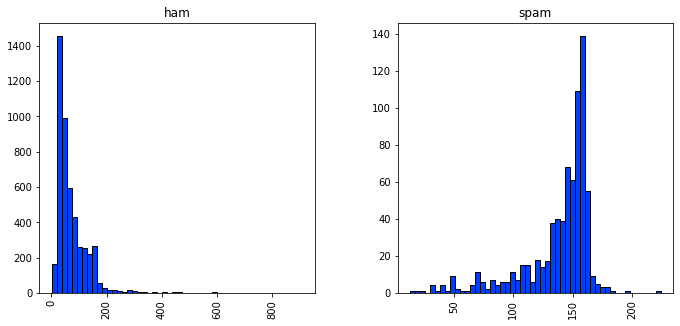

In [13]:
mtl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
sms.hist(column='length', by='label', bins=50, figsize=(11, 5))
plt.show()

In [14]:
text_feat = sms['message'].copy()



In [21]:
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
def text_process(text):
    text = text.translate(str.maketrans("", "", string.punctuation))
    #print(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
text_process("hey ! it's good to see you ")

'hey good see'

In [23]:
text_feat = text_feat.apply(text_process)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer("english")

In [25]:
features = vectorizer.fit_transform(text_feat)
features

<5572x9376 sparse matrix of type '<class 'numpy.float64'>'
	with 47254 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, sms['label'],
                                                    test_size=0.3, random_state=123)

In [29]:
# we are going to use two types of classifiers 
# 1: Logistic Regression 
# 2: NaiveBayes 


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [31]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB(alpha=0.2)

In [33]:
print(lr.fit(X_train, y_train))
print(mnb.fit(X_train, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
def conf_matrix_acc(y_true, y_pred):
    print(confusion_matrix(y_true, y_pred))
    print(accuracy_score(y_true, y_pred))


In [35]:
y_pred_lr = lr.predict(X_test)
y_pred_nb = mnb.predict(X_test) 

In [36]:
conf_matrix_acc(y_test, y_pred_lr)
conf_matrix_acc(y_test, y_pred_nb)

[[1452    5]
 [  86  129]]
0.9455741626794258
[[1451    6]
 [  17  198]]
0.986244019138756


In [42]:
# STEMMER 
from nltk.stem import SnowballStemmer

In [43]:
def stemmer_(text):
    text = text.split()
    words = ""
    for i in text: 
        stemmer = SnowballStemmer("english") 
        words += (stemmer.stem(i))+" "
    
    return words

In [44]:
text_feat = text_feat.apply(stemmer_)

In [45]:
features = vectorizer.fit_transform(text_feat)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    sms['label'],
                                                    test_size=0.3, 
                                                    random_state=111)

In [47]:
print(lr.fit(X_train, y_train))
print(mnb.fit(X_train, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)


In [48]:
y_pred_lr = lr.predict(X_test)
y_pred_nb = mnb.predict(X_test)

In [49]:
conf_matrix_acc(y_test, y_pred_lr)
conf_matrix_acc(y_test, y_pred_nb)

[[1425   15]
 [  74  158]]
0.9467703349282297
[[1429   11]
 [  14  218]]
0.9850478468899522
